<h3 style="text-align:center;">Escuela Politécnica Nacional</h3>

**Nombre:** Luis Coronado

**Fecha:** 25/01/2025

**Asignatura:** Métodos Numéricos  

**Tema:** minimos cuadrados

**enlace del repositorio en "github":** https://github.com/LAINE30/-Participaci-n-en-clase-.git


# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [55]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [14]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [56]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-26 11:37:02][INFO] Se ajustarán 2 parámetros.
[01-26 11:37:02][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-26 11:37:18][INFO] Se ajustarán 2 parámetros.
[01-26 11:37:18][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


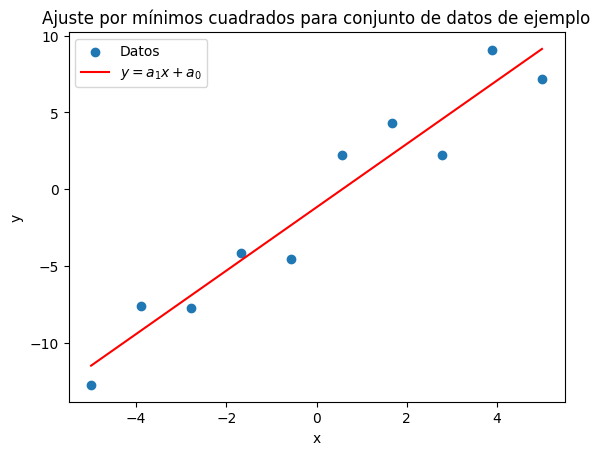

In [57]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [42]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

In [44]:
# Derivadas parciales para regresión lineal
# ####################################################################

def der_parcial_2(xs1: list, ys1: list) -> tuple[float, float, float, float]:
    

    # coeficiente del término independiente
    c_ind = sum(xi**2 * yi for xi, yi in zip(xs1, ys1))

    # coeficiente del parámetro 2
    c_2 = sum(xi ** 4 for xi in xs1)
    # coeficiente del parámetro 1
    c_1 = sum(xi ** 3 for xi in xs1)

    # coeficiente del parámetro 0
    c_0 = sum(xi ** 2 for xi in xs1)

    return (c_2,c_1, c_0, c_ind)

def der_parcial_1(xs1: list, ys1: list) -> tuple[float, float, float, float]:
    
    c_2 = sum(xi ** 3 for xi in xs1)#Suma de los valores de xi*𝑥i^2

    # coeficiente del parámetro 1
    c_1 = sum(xi ** 2 for xi in xs1)#Suma de los valores de *xi*𝑥i

    # coeficiente del parámetro 0
    c_0 = sum(xs1)#Suma de los valores de xi

    c_ind = sum(xi * yi for xi, yi in zip(xs1, ys1))#Suma de los valores de xi*yi

    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs1: list, ys1: list) -> tuple[float, float, float, float]:
    

    c_2 = sum(xi ** 2 for xi in xs1)#Suma de los valores de 𝑥^2

    c_1 = sum(xs1)#Suma de los valores de x

    c_0 = len(xs1)#Número total de elementos

    c_ind = sum(ys1)#Suma de los valores de y

    return (c_2, c_1, c_0, c_ind)

In [45]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

print(pars)

[01-26 09:12:15][INFO] Se ajustarán 3 parámetros.
[01-26 09:12:15][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-26 09:12:15][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[np.float64(2.024410482925083), np.float64(-1.1233251295755429), np.float64(-0.6382556172537739)]


[01-26 09:12:18][INFO] Se ajustarán 3 parámetros.
[01-26 09:12:18][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-26 09:12:18][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


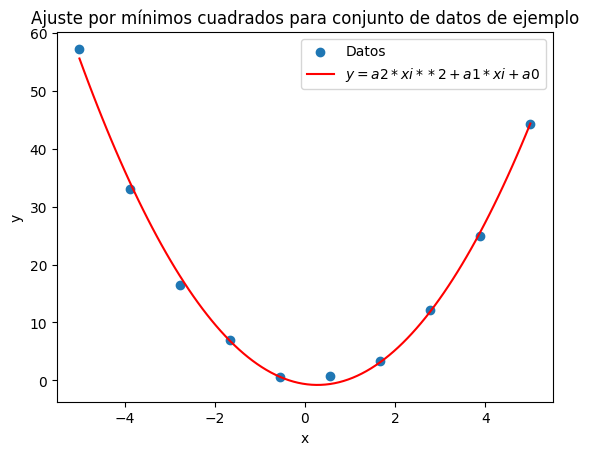

In [46]:
a2, a1, a0 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

x22 = np.linspace(-5, 5, 100)

y11 = [a2 * xi**2 + a1*xi + a0 for xi in x22]

plt.scatter(xs1, ys1, label="Datos")
plt.plot(x22, y11, color="red", label=r"$ y = a2 * xi**2 + a1*xi + a0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

## Conjunto de datos 2

In [52]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

Interpole el conjunto de datos 2 usando la función exponencial. 

In [58]:
# Transformar ys2 para la regresión lineal
log_ys2 = np.log(ys2)

# Ajustar los datos transformados usando mínimos cuadrados
pars_exp = ajustar_min_cuadrados(xs2, log_ys2, gradiente=[der_parcial_0, der_parcial_1])

# Obtener los coeficientes de la función exponencial
b_exp, log_a_exp = pars_exp
a_exp = np.exp(log_a_exp)

# Generar los valores de y usando la función exponencial
y_exp = [a_exp * np.exp(b_exp * xi) for xi in x]

print(f"a = {a_exp}, b = {b_exp}")
y_5 = a_exp * np.exp(b_exp * 5)
y_1 = a_exp * np.exp(b_exp * 1)
print(f"y(5) = {y_5}")
print(f"y(1) = {y_1}")

[01-26 11:37:28][INFO] Se ajustarán 2 parámetros.
[01-26 11:37:28][INFO] 
[[22.0372     20.         19.05727035]
 [ 0.         -9.57184451  5.82589171]]
a = 0.5440855388147071, b = 1.4171603667055432
y(5) = 650.1174439111692
y(1) = 2.2445646053759503


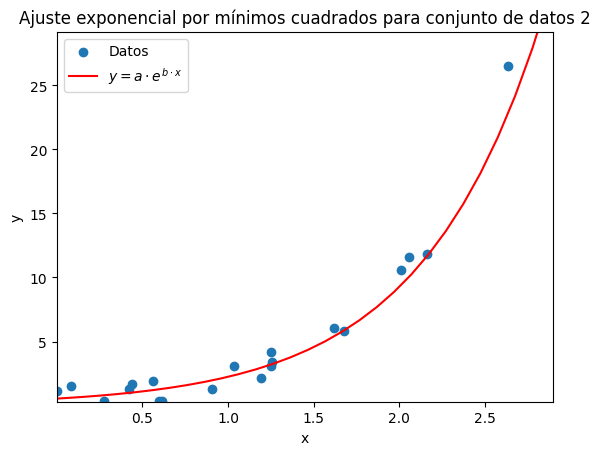

In [59]:
# Graficar los datos y la función exponencial ajustada
plt.scatter(xs2, ys2, label="Datos")
plt.ylim(min(ys2) * 0.9, max(ys2) * 1.1)
plt.xlim(min(xs2) * 0.9, max(xs2) * 1.1)
plt.plot(x, y_exp, color="red", label=r"$ y = a \cdot e^{b \cdot x} $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados para conjunto de datos 2")
plt.legend()
plt.show()